In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_FINAL/Clean_Final_Data.csv')
df.head(10)

,height_cm,weight_kg,nationality,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,contract_valid_until,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,180,67,United States,70,80,Right,1,4,3,2023,...,53,50,60,59,57,14,15,11,12,5
1,193,79,Belgium,67,72,Right,1,3,2,2023,...,52,68,42,59,52,5,13,14,12,6
2,177,68,Argentina,80,83,Left,1,3,4,2023,...,65,80,64,73,68,10,7,10,14,10
3,177,68,Argentina,80,83,Left,1,3,4,2023,...,65,80,64,73,68,10,7,10,14,10
4,180,70,Burkina Faso,72,83,Right,1,3,2,2023,...,24,54,60,67,68,10,8,9,14,13
5,180,70,Burkina Faso,72,83,Right,1,3,2,2023,...,24,54,60,67,68,10,8,9,14,13
6,193,79,Ukraine,62,70,Right,1,4,2,2023,...,71,48,17,18,17,13,9,10,10,7
7,193,79,Ukraine,62,70,Right,1,4,2,2023,...,71,48,17,18,17,13,9,10,10,7
8,182,75,Ukraine,73,76,Right,1,4,3,2023,...,68,64,59,59,55,15,12,6,11,10
9,184,74,Poland,65,76,Right,1,3,3,2023,...,54,66,37,32,37,9,7,12,8,8


In [3]:
target_var = 'fee'

df_encoded = df.copy()

df_encoded = pd.get_dummies(df_encoded)

# Tính toán tương quan
correlation_matrix = df_encoded.corr()

# Lấy giá trị tuyệt đối của tương quan với biến mục tiêu
correlation_with_target = correlation_matrix[target_var].abs().sort_values(ascending=False)

print("Tương quan với biến mục tiêu:")
for index, value in correlation_with_target.items():
    print(f"{index}: {value}")

Tương quan với biến mục tiêu:
fee: 1.0
potential: 0.3647804158832329
league_Premier League: 0.23497664652958072
overall: 0.2034595040048438
international_reputation: 0.1770443792932209
movement_reactions: 0.16734232549549177
mentality_composure: 0.1521253334051844
age: 0.13124379151776783
attacking_short_passing: 0.12943264697296575
mentality_vision: 0.11980595603747392
skill_ball_control: 0.11485182078820191
nationality_England: 0.1147701838009352
skill_moves: 0.11317729742670278
skill_dribbling: 0.10707081924463735
skill_long_passing: 0.09772255024213523
skill_fk_accuracy: 0.09272314353769325
league_Super Lig: 0.08738413950461232
movement_sprint_speed: 0.08442743584654457
attacking_volleys: 0.0834015487253578
league_Laliga: 0.08186573982885892
skill_curve: 0.08106303993519046
league_Jupiler Pro League: 0.0773868361000151
mentality_penalties: 0.07662459697215784
movement_acceleration: 0.07563916558635876
power_stamina: 0.07473610836526615
power_shot_power: 0.0732090024163163
movement_

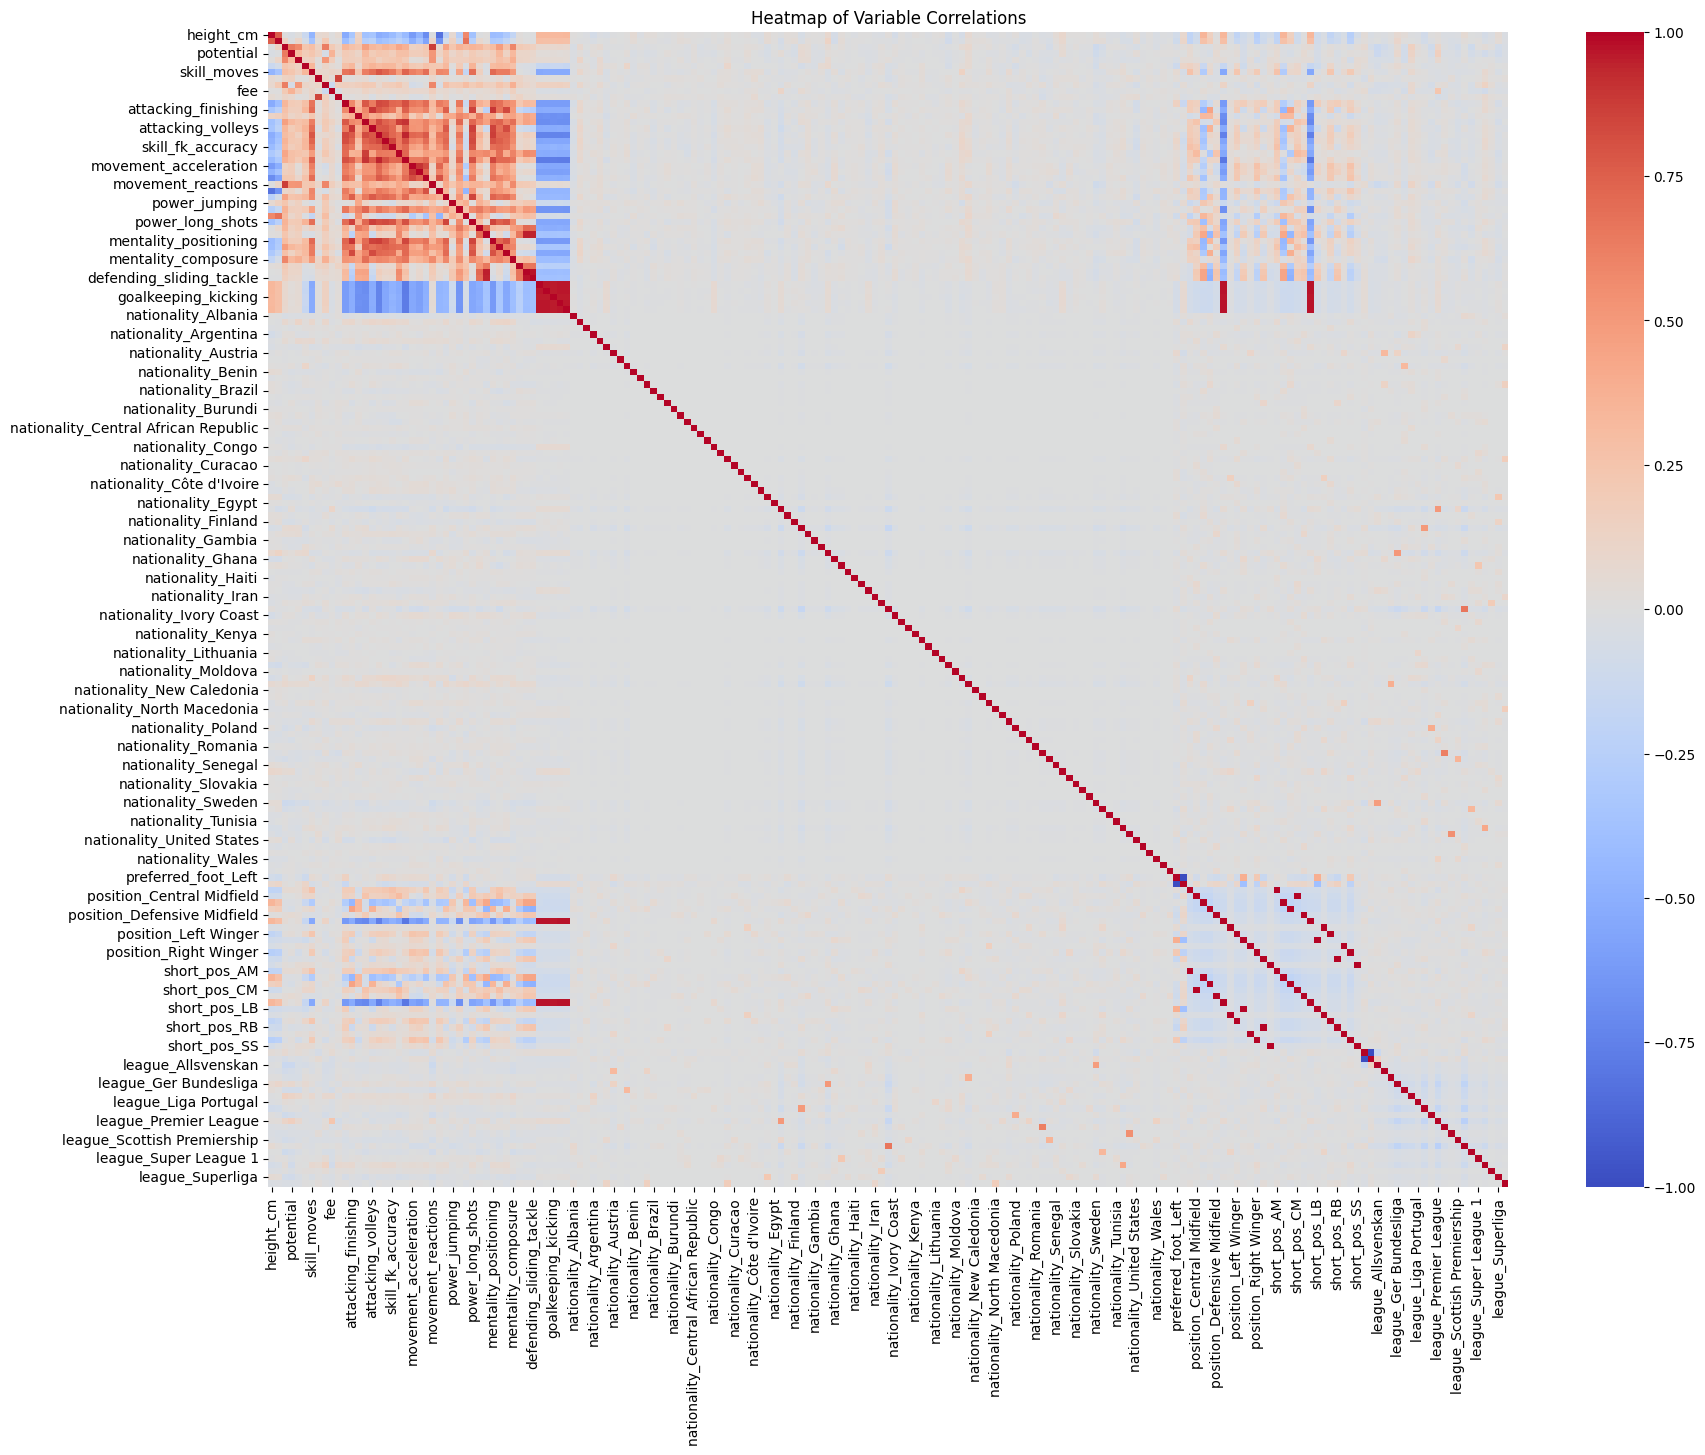

In [4]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Variable Correlations")
plt.show()

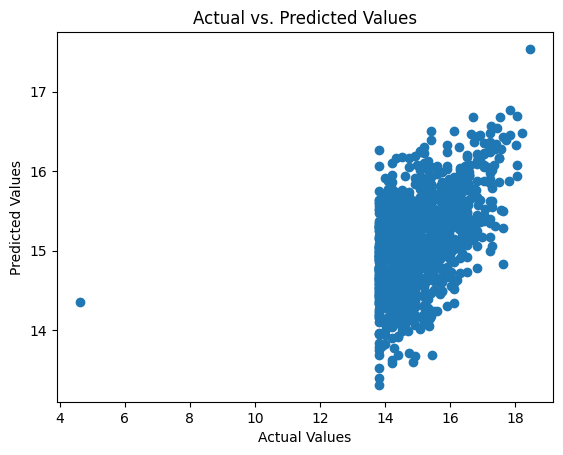

Mean Squared Error: 0.7441578054033596
R-squared: 0.2725980322932072
Mean Absolute Error: 0.6656709902801075
Median Absolute Error: 0.5798136843529189
Score:0.2725980322932072


In [5]:
from sklearn.linear_model import LinearRegression

features = ['height_cm', 'weight_kg', 'nationality', 'overall', 'potential', 'preferred_foot',
            'international_reputation', 'weak_foot', 'skill_moves', 'contract_valid_until', 'age',
            'position', 'short_pos', 'window', 'league', 'season', 'attacking_crossing', 
            'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 
            'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
            'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 
            'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
            'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
            'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle',
            'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes']


X = df[features]
y = df['fee']

# Phân chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Pipeline cho xử lý đặc trưng
numeric_features = X.select_dtypes(include=['int64', 'float64','int32']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline cho mô hình hồi quy tuyến tính
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Huấn luyện mô hình
model.fit(X_train, y_train_log)

# Dự đoán trên tập kiểm tra
predictions = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test_log, predictions)
r2 = r2_score(y_test_log, predictions)
mae = mean_absolute_error(y_test_log, predictions)
medae = median_absolute_error(y_test_log, predictions)

# Visual evaluation
plt.scatter(y_test_log, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Median Absolute Error: {medae}')
print(f'Score:{model.score(X_test,y_test_log)}')

In [6]:
y_preds = model.predict(X_train.head(10))
y_preds

array([15.84030462, 14.87435354, 14.42350709, 14.32786514, 16.02758668,
       15.304151  , 14.47925336, 16.09989395, 15.06901174, 14.29598656])

In [7]:

temp_df = pd.DataFrame({'y': np.exp(y_train_log).head(10), 'y_preds': np.exp(y_preds)})

# Đặt kiểu số trong khi hiển thị DataFrame
with pd.option_context('display.float_format', '{:,.2f}'.format):
    print(temp_df)


                 y      y_preds
4491  3,500,001.00 7,574,550.87
3873  1,000,001.00 2,883,033.35
4071  2,500,001.00 1,836,747.84
164   1,800,001.00 1,669,216.89
319   8,000,001.00 9,134,661.42
3816  1,600,001.00 4,431,067.13
4335  1,980,001.00 1,942,047.45
5259 15,000,001.00 9,819,629.52
2982  9,000,001.00 3,502,584.71
2101  1,300,001.00 1,616,843.84


In [8]:
from sklearn.ensemble import RandomForestRegressor

features = ['height_cm', 'weight_kg', 'nationality', 'overall', 'potential', 'preferred_foot',
            'international_reputation', 'weak_foot', 'skill_moves', 'contract_valid_until', 'age',
            'position', 'short_pos', 'window', 'league', 'season', 'attacking_crossing', 
            'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 
            'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
            'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 
            'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
            'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
            'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle',
            'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes']

X = df[features]
y = df['fee']

# Xử lý biến mục tiêu
y_log = np.log1p(y)

# Phân chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Pipeline cho xử lý đặc trưng
numeric_features = X.select_dtypes(include=['int64', 'float64','int32']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline cho mô hình RandomForestRegressor
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Huấn luyện mô hình
model_rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions_rf = model_rf.predict(X_test)

# Đánh giá mô hình
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
medae_rf = median_absolute_error(y_test, predictions_rf)
score = model.score(X_test,y_test)
print(f'Score: {score}')
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'Median Absolute Error (Random Forest): {medae_rf}')


Score: 0.3441211098856959
Mean Squared Error (Random Forest): 0.5670389120842322
R-squared (Random Forest): 0.44177953094919176
Mean Absolute Error (Random Forest): 0.5827206094899392
Median Absolute Error (Random Forest): 0.45903262991852145


In [9]:
from xgboost import XGBRegressor

features = ['height_cm', 'weight_kg', 'nationality', 'overall', 'potential', 'preferred_foot',
            'international_reputation', 'weak_foot', 'skill_moves', 'contract_valid_until', 'age',
            'position', 'short_pos', 'window', 'league', 'season', 'attacking_crossing', 
            'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 
            'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
            'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 
            'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
            'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
            'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle',
            'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes']

target_var = 'fee'

X = df[features]
y = df[target_var]

y_log = np.log1p(y)

# Phân chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Pipeline cho xử lý đặc trưng
numeric_features = X.select_dtypes(include=['int64', 'float64','int32']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Sử dụng mô hình XGBoost
xgb_model = XGBRegressor(objective ='reg:squarederror', random_state=42)

# Pipeline cho mô hình XGBoost với xử lý đặc trưng
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# Huấn luyện mô hình XGBoost
xgb_pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
xgb_predictions = xgb_pipeline.predict(X_test)

# Đánh giá mô hình XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_medae = median_absolute_error(y_test, xgb_predictions)
acc = model.score(X_test,y_test)
print(f'Accuracy: {acc}')
print("\nXGBoost Model:")
print(f'Mean Squared Error (XGBoost): {xgb_mse}')
print(f'R-squared (XGBoost): {xgb_r2}')
print(f'Mean Absolute Error (XGBoost): {xgb_mae}')
print(f'Median Absolute Error (XGBoost): {xgb_medae}')


Accuracy: 0.3441211098856959

XGBoost Model:
Mean Squared Error (XGBoost): 0.5775646300487648
R-squared (XGBoost): 0.4314175062379404
Mean Absolute Error (XGBoost): 0.5793482762227752
Median Absolute Error (XGBoost): 0.4434492882481056
